LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

The dataset is downloaded from Kaggle. https://www.kaggle.com/wordsforthewise/lending-club

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off),I am building a model that can predict wether or not a borrower will pay back their loan? 
This way in the future when we get a new potential customer we can access whether or not they are likely to pay back the loan
So therefore we can offer the loan only to that person how is able to pay back the loan amount.

Used Keras API for Neural networks model from Tensorflow

Used Seaborn,Scikit-learn,Pandas,Matplotlib etc..

In [229]:
import pandas as pd

In [230]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [231]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [232]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [233]:
feat_info('mort_acc')

Number of mortgage accounts.


In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [235]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
print(np.__version__)

1.14.0
1.16.4


In [236]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

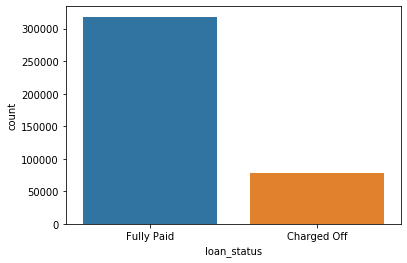

In [238]:
# Count plot with respect to Loan Status
sns.countplot(x="loan_status",data=df)

In [239]:
# Correlation between all continuous numeric variables 
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336888,0.016633,0.198558,-0.077779,0.328320,0.099912,0.223887,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056767,0.079032,0.011653,0.060986,-0.011279,0.293662,-0.036400,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330382,0.015783,0.188975,-0.067892,0.316455,0.123916,0.202431,0.193694,-0.098628
annual_inc,0.336888,-0.056767,0.330382,1.000000,-0.081688,0.136155,-0.013719,0.299775,0.027877,0.193028,0.236322,-0.050162
dti,0.016633,0.079032,0.015783,-0.081688,1.000000,0.136174,-0.017640,0.063569,0.088369,0.102122,-0.025442,-0.014560
open_acc,0.198558,0.011653,0.188975,0.136155,0.136174,1.000000,-0.018391,0.221194,-0.131410,0.680731,0.109207,-0.027731
pub_rec,-0.077779,0.060986,-0.067892,-0.013719,-0.017640,-0.018391,1.000000,-0.101663,-0.075909,0.019724,0.011552,0.699408
revol_bal,0.328320,-0.011279,0.316455,0.299775,0.063569,0.221194,-0.101663,1.000000,0.226348,0.191618,0.194926,-0.124532
revol_util,0.099912,0.293662,0.123916,0.027877,0.088369,-0.131410,-0.075909,0.226348,1.000000,-0.104264,0.007516,-0.086750
total_acc,0.223887,-0.036400,0.202431,0.193028,0.102122,0.680731,0.019724,0.191618,-0.104264,1.000000,0.381073,0.042036


In [240]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [241]:
feat_info("loan_amnt")

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


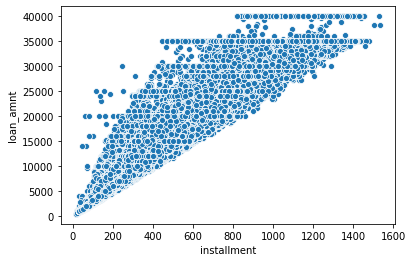

In [242]:
# Relation Between installment and Loan amount through Scatter Plot
sns.scatterplot(x='installment',y="loan_amnt",data=df)

In [243]:
# Summary statistics for the loan amount, grouped by the loan_status.
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [244]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [245]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

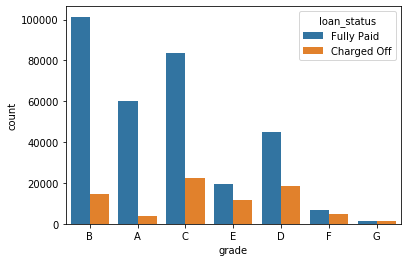

In [246]:
# Count plot of Grade group by Loan Status
sns.countplot(x='grade',data=df,hue='loan_status')

In [247]:
# Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [248]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,< 1 year,RENT,540.0,...,0.0,0.0,0.5,0.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [249]:
# displaying the total count of missing values per column
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [250]:
# Examining emp_title and emp_length to see whether it will be okay to drop them
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [251]:
df['emp_title'].nunique()

173105

In [252]:
df['emp_title'].value_counts()

Teacher                              4389
Manager                              4250
Registered Nurse                     1856
RN                                   1846
Supervisor                           1830
                                     ... 
SCHOOL ADMIN. ASST.                     1
Cliffwater                              1
Lab techinican                          1
Drew Auto Center                        1
Senior Operations Officer/Analyst       1
Name: emp_title, Length: 173105, dtype: int64

In [253]:
# Realistically there are too many unique job titles to try to convert this to a dummy variable feature.
# So removing this column
df=df.drop('emp_title',axis=1)

In [254]:
feat_info("emp_length")
sorted(df['emp_length'].dropna().unique())

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [255]:
emp_length_order = [ '< 1 year', '1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

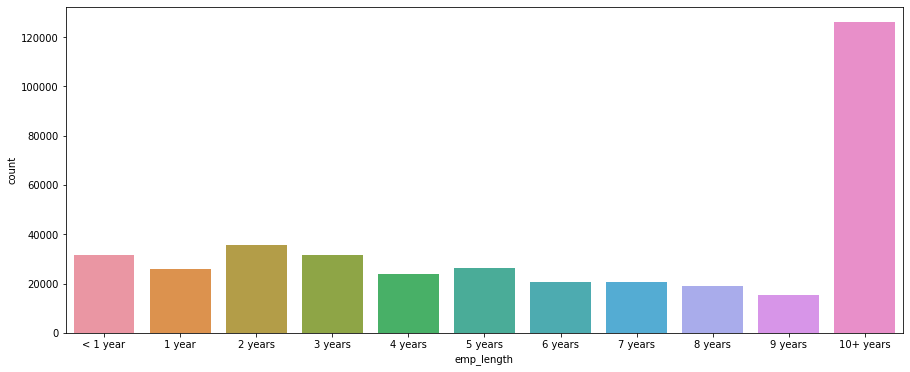

In [256]:
# Creating a count plot of employment length
plt.figure(figsize=(15,6))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

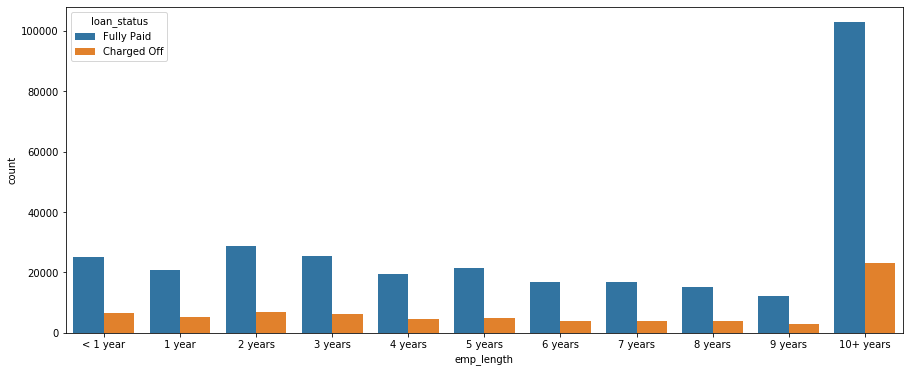

In [257]:
# Creating a count plot of employment length group by loan status
plt.figure(figsize=(15,6))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.

In [258]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [259]:
emp_fp=df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [260]:
emp_l=emp_co/emp_fp

In [261]:
emp_l

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233355
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260819
Name: loan_status, dtype: float64

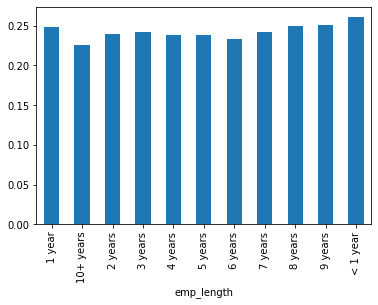

In [262]:
emp_l.plot(kind='bar')

In [263]:
# Charge off rates are extremely similar across all employment lengths.
# So droping the column emp_length
df=df.drop('emp_length',axis=1)

In [264]:
# Now  revisiting the DataFrame to see what feature columns still have missing data.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [265]:
#  Reviewing the title column vs the purpose column
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [266]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [267]:
# The title column is simply a string subcategory/description of the purpose column.
# Therefore droping title column
df=df.drop('title',axis=1)

In [268]:
feat_info('mort_acc')

Number of mortgage accounts.


In [269]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [270]:
print("Correlation with the number of mortage account")
df.corr()['mort_acc'].sort_values()

Correlation with the number of mortage account


int_rate               -0.082583
dti                    -0.025442
revol_util              0.007516
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109207
installment             0.193694
revol_bal               0.194926
loan_amnt               0.222315
annual_inc              0.236322
total_acc               0.381073
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [271]:
# The total_acc feature correlates with the mort_acc
# Calculating the mean value for the mort_acc per total_acc entry
print("Mean of number of mortage account per total number of account")
df.groupby('total_acc').mean()['mort_acc']

Mean of number of mortage account per total number of account


total_acc
0.0      0.000000
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 119, dtype: float64

In [272]:
# Filling in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
def fill_mort_acc(total_acc,mort_acc):
    if(np.isnan(mort_acc)):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [273]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [274]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [275]:
# Removing the rows having missing values
df=df.dropna()

In [276]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [277]:
#Converting the term feature into either a 36 or 60 integer numeric data type
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [278]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [279]:
# We already know that grade is part of sub_grade, so just dropping the grade feature
df = df.drop('grade',axis=1)

In [280]:
# Converting the subgrade into dummy variables and concatenating these new columns to the dataframe
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [281]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [282]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,540.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [283]:
# Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [284]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,540.0,Nov-2014,Fully Paid,29.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [285]:
# Reviewing the value_counts for the home_ownership column.
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [286]:
# Converting these to dummy variables and concatenating them with the original dataframe
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [287]:
# Creating a column called 'zip_code' that extracts the zip code from the address column
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [288]:
#  Now making this zip_code column into dummy variables
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [289]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,540.0,Nov-2014,Fully Paid,29.60,Sep-2006,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0


In [290]:
# Dropping issue date column
df = df.drop('issue_d',axis=1)

In [291]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,540.0,Fully Paid,29.60,Sep-2006,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [292]:
#  earliest_cr_line appears to be a historical time stamp feature. Extracting the year from this feature.
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [293]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [294]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [295]:
#  dropping the loan_status column we created earlier, since its a duplicate of the loan_repaid column.
df = df.drop('loan_status',axis=1)

In [296]:
x = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [297]:
print(len(df))

df.to_csv('processed.csv')

395219


In [302]:
df.head()


,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,540.0,29.60,0.0,0.0,0.0,0.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999


In [298]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [299]:
# # Normalizing The Data using MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler as mxs
# sc=mxs()
# X_train=sc.fit_transform(X_train)
# X_test=sc.fit_transform(X_test)

In [300]:
# # creating the neural Network Model using Keras from Tensorfow
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Dropout

In [301]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #standardize the dataset
sc.fit(X_train)
Xtrain = sc.transform(X_train)
Xtest = sc.transform(X_test)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Confusion Matrix : 
[[0, 3], [12, 84]]


Accuracy : 0.8484848484848485
Precision : 0.9655172413793104
Recall : 0.875
F1 SCORE : 0.9180327868852458


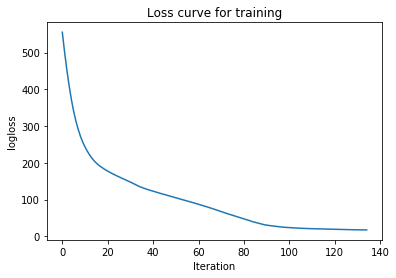

In [328]:

lbw_df = pd.read_csv('../data/processed.csv')

X = lbw_df.drop('loan_repaid',axis=1).values 
y_label = lbw_df['loan_repaid'].values  

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.3) 

sc = StandardScaler() 
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)
 
class NN(): 
    def __init__(self, layers=[75,4,229], learning_rate=0.0001, iterations=135):#function to initialise . four hidden layer with 229 nodes
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        
        np.random.seed(1) 
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 

        self.params['b1']  =np.random.randn(self.layers[1],) 
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)



    def relu(self,Z): #relu is used as activation function
        
        return np.maximum(0,Z)
    
        
    def sigmoid(self,Z):  #sigmoid is used to restrict the final output to [0,1]
       
        return 1.0/(1.0+np.exp(-Z))
    
    def loss_func(self,y, yhat): # y->true value , yhat->predicted value. re
        sample = len(y)
        loss = -1/sample * (np.sum(np.multiply(np.log(yhat+0.0001), y) + np.multiply((1 - y), np.log(1 - yhat+0.0001))))
        return loss


    def forward_propagation(self):
         #Compute the weighted sum between the input and the first layer's weights and then add the bias
        level_1 = self.X.dot(self.params['W1']) + self.params['b1']  

           #Pass the result through the ReLU activation function                  
        A1 = self.relu(level_1)

        #Compute the weighted sum between the output (A1) of the previous step and the second layer's weights—also add the bias
        level_2 = A1.dot(self.params['W2']) + self.params['b2']

        #Compute the output function by passing the result through a sigmoid function
        yhat = self.sigmoid(level_2)

        #compute the loss between the predicted output and the true labels:
        loss = self.loss_func(self.y,yhat)

            
        self.params['level_1'] = level_1
        self.params['level_2'] = level_2
        self.params['A1'] = A1

        # return the predicted values and the loss.
        return yhat,loss


    def back_propagation(self,yhat):
        
        # function to calculate the derivatives of the ReLU
        def dRelu(x):
            x[x<=0] = 0
            x[x>0] = 1
            return x
        

        #calcaulating derivatives using chain rule.
        der_wrt_yhat = -(np.divide(self.y,yhat+0.0001) - np.divide((1 - self.y),(1-yhat+0.0001)))
        der_wrt_sig = yhat * (1-yhat)
        der_wrt_z2 = der_wrt_yhat * der_wrt_sig

        der_wrt_A1 = der_wrt_z2.dot(self.params['W2'].T)
        der_wrt_w2 = self.params['A1'].T.dot(der_wrt_z2)
        der_wrt_b2 = np.sum(der_wrt_z2, axis=0)

        der_wrt_z1 = der_wrt_A1 * dRelu(self.params['level_1'])
        der_wrt_w1 = self.X.T.dot(der_wrt_z1)
        der_wrt_b1 = np.sum(der_wrt_z1, axis=0)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * der_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * der_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * der_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * der_wrt_b2


    def fit(self, X, y):    #Trains the neural network using the specified data and labels
       
        #save the train and target to the class variable  
        self.X = X
        self.y = y
        self.init_weights() # then initializes the weights and biases

        for i in range(self.iterations):  #performs forward and backpropagation, saves the loss.
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)


    def predict(self, X):   # Predicts on a test data
        
       #passes the data through the forward propagation layer and computes the prediction using the saved weights and biases
        
        P1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(P1)
        P2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(P2)
        ans=[]
        pred=np.round(pred)
        for i in range(len(pred)):
            ans.append(int(pred[i][0]))
        return ans
    
    #CM-Confusion Matrix
    def CM(self,y_test,y_test_obs):
        
        #We are making a boolean matrix 
        for i in range(len(y_test_obs)):
                if(y_test_obs[i]>0.6):
                       y_test_obs[i]=1
                else:
                        y_test_obs[i]=0
        
        cm=[[0,0],[0,0]]
        fp=0
        fn=0
        tp=0
        tn=0
        
        for i in range(len(y_test)):
            if(y_test[i]==1 and y_test_obs[i]==1):
                tp=tp+1
            if(y_test[i]==0 and y_test_obs[i]==0):
                tn=tn+1
            if(y_test[i]==1 and y_test_obs[i]==0):
                fp=fp+1
            if(y_test[i]==0 and y_test_obs[i]==1):
                fn=fn+1
        cm[0][0]=tn
        cm[0][1]=fp
        cm[1][0]=fn
        cm[1][1]=tp

        p= tp/(tp+fp)
        r=tp/(tp+fn)
        f1=(2*p*r)/(p+r)
        a=(tp+tn)/(tp+tn+fp+fn)
        print("Confusion Matrix : ")
        print(cm)
        print("\n")
        print(f"Accuracy : {a}")
        print(f"Precision : {p}")
        print(f"Recall : {r}")
        print(f"F1 SCORE : {f1}")
    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()
net=NN()
net.fit(Xtrain,ytrain)
predicted_y=net.predict(Xtest)
print(predicted_y)
net.CM(ytest,predicted_y)
net.plot_loss()

In [ ]:
model = Sequential()

In [ ]:
model = Sequential()

# Took reference from stack overflow


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
#  Fitting the model to the training data for about 25 epochs with batch size=400
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=400,
          validation_data=(X_test, y_test), 
          )

In [ ]:
# Evaluating Model Performance.
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
# Creating predictions from the X_test set and display a classification report and confusion matrix for the X_test set.
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
confusion_matrix(y_test,predictions)

Checking given the customer below, would you offer this person a Loan or not?

In [ ]:
import random
random.seed(101)
random_ind =random.randint(0,len(df))
#random_ind=285084
print(random_ind)

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

In [ ]:
major = model.predict(new_customer.values.reshape(1,78))

In [ ]:
import emoji
if major==1:
    print("You can give him the Loan \U0001f600")
else:
    print("Sorry the bank can't give him the loan \U0001f910")

In [ ]:
# Now checking that did this person actually end up paying back their loan?
df.iloc[random_ind]['loan_repaid']

In [ ]:
#285084